# TMDrefined Preds for arithmetic mean with threshold = 2

In [1]:
#imports
import numpy as np
import pandas as pd
import os
import glob
import scripts.ML_TMDrefined as ml_ref
import scripts.Translate_TMDrefined as t_ref
import scripts.StandardConfig as stdc

In [2]:
# get all the files
path, sep = stdc.find_folderpath()
path_labels = f"{path}{sep}label_am2_data{sep}"
list_df_analysis_tags = glob.glob(f"{path_labels}*.xlsx")
list_df_analysis_tags

['/home/freiherr/PycharmProjects/TMDrefined/label_am2_data/am2_test_C.xlsx',
 '/home/freiherr/PycharmProjects/TMDrefined/label_am2_data/am2_test_N.xlsx',
 '/home/freiherr/PycharmProjects/TMDrefined/label_am2_data/am2_train_C.xlsx',
 '/home/freiherr/PycharmProjects/TMDrefined/label_am2_data/am2_train_N.xlsx',
 '/home/freiherr/PycharmProjects/TMDrefined/label_am2_data/am_label_single_start_pos_TMD_thresh=2_CPP_top.xlsx',
 '/home/freiherr/PycharmProjects/TMDrefined/label_am2_data/am_label_single_stop_pos_TMD_thresh=2_CPP_top.xlsx',
 '/home/freiherr/PycharmProjects/TMDrefined/label_am2_data/first_of_top60_scales_cat.xlsx']

## N-term Pred with threshold 2 for arithmetic mean

In [3]:
test_am_N2 = pd.read_excel('/home/freiherr/PycharmProjects/TMDrefined/label_am2_data/am2_test_N.xlsx').set_index("ID")
train_am_N2 = pd.read_excel('/home/freiherr/PycharmProjects/TMDrefined/label_am2_data/am2_train_N.xlsx',).set_index("ID")
am_N2_top_CPP = pd.read_excel('/home/freiherr/PycharmProjects/TMDrefined/label_am2_data/am_label_single_start_pos_TMD_thresh=2_CPP_top.xlsx').set_index("Unnamed: 0")

In [4]:
am_N2_top_CPP.head(15)

,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions
Unnamed: 0,,,,,,,,,,,,,
0,"TMD-Segment(1,1)-LINS030107",ASA/Volume,Accessible surface area (ASA),ASA (folded protein),% total accessible surfaces vs win3 of whole r...,0.161,0.074,-0.074,0.105,0.138,0,0,"11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,2..."
1,"TMD-Segment(1,1)-BLAS910101",Polarity,Hydrophobicity (surrounding),Side chain hydrophobicity,Scaled side chain hydrophobicity values (Black...,0.154,0.072,0.072,0.108,0.137,0,0,"11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,2..."
2,"TMD-Segment(1,1)-VINM940101",Structure-Activity,Flexibility,Flexibility,"Normalized flexibility parameters (B-values), ...",0.154,0.068,-0.068,0.110,0.128,0,0,"11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,2..."
3,"TMD-Segment(1,1)-MIYS990105",Composition,MPs (anchor),Partition energy,Optimized relative partition energies - method...,0.153,0.072,-0.072,0.117,0.139,0,0,"11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,2..."
4,"TMD-Segment(1,1)-GRAR740102",Polarity,Hydrophilicity,Polarity (hydrophilicity),"Polarity (Grantham, 1974)",0.153,0.069,-0.069,0.103,0.130,0,0,"11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,2..."
5,"TMD-Segment(1,1)-NISK800101",ASA/Volume,Buried,Interactivity,"8 A contact number (Nishikawa-Ooi, 1980)",0.153,0.066,0.066,0.107,0.128,0,0,"11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,2..."
6,"TMD-Segment(1,1)-WOLS870101",Others,PC 5,Principal Component 1 (Wold),"Principal property value z1 (Wold et al., 1987)",0.142,0.078,-0.078,0.141,0.158,0,0,"11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,2..."
7,"TMD-Segment(1,1)-MEIH800101",Shape,Reduced distance,Reduced distance (C-α),Average reduced distance for C-alpha (Meirovit...,0.141,0.076,-0.076,0.141,0.156,0,0,"11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,2..."
8,"TMD-Segment(1,1)-BASU050102",Structure-Activity,Stability,Interactivity,Interactivity scale obtained by maximizing the...,0.135,0.087,0.087,0.170,0.183,0,0,"11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,2..."


In [5]:
train_am_N2.head(5)

,window_left,window_right,label,start_pos_TMD,norm_intersect_pos
ID,,,,,
INAR2_HUMAN__0,ESAK,IGGI,1,244,0.473786
INAR2_HUMAN__-1,AESA,KIGG,1,243,0.471845
INAR2_HUMAN__1,SAKI,GGII,0,245,0.475728
INAR2_HUMAN__-2,SAES,AKIG,0,242,0.469903
INAR2_HUMAN__2,AKIG,GIIT,0,246,0.477670


In [6]:
am_N2_top_CPP["category"].unique()

array(['ASA/Volume', 'Polarity', 'Structure-Activity', 'Composition',
       'Others', 'Shape', 'Conformation'], dtype=object)

In [7]:
train_am_N2.columns

Index(['window_left', 'window_right', 'label', 'start_pos_TMD',
       'norm_intersect_pos'],
      dtype='object')

In [8]:
train_N_drop = train_am_N2.drop_duplicates(subset=['window_left', 'window_right']).dropna()
train_N_drop

,window_left,window_right,label,start_pos_TMD,norm_intersect_pos
ID,,,,,
INAR2_HUMAN__0,ESAK,IGGI,1,244,0.473786
INAR2_HUMAN__-1,AESA,KIGG,1,243,0.471845
INAR2_HUMAN__1,SAKI,GGII,0,245,0.475728
INAR2_HUMAN__-2,SAES,AKIG,0,242,0.469903
INAR2_HUMAN__2,AKIG,GIIT,0,246,0.477670
...,...,...,...,...,...
KLOTB_HUMAN__-1,VQKK,PLIF,0,996,0.954023
KLOTB_HUMAN__1,KKPL,IFLG,0,998,0.955939
KLOTB_HUMAN__-2,LVQK,KPLI,0,995,0.953065


In [9]:
train_N_drop.describe()

,label,start_pos_TMD,norm_intersect_pos
count,15252.000000,15252.000000,15252.000000
mean,0.275243,477.720955,0.668755
std,0.446651,650.193938,0.264797
min,0.000000,2.000000,0.003968
25%,0.000000,153.000000,0.518519
50%,0.000000,312.000000,0.756443
75%,1.000000,629.000000,0.877551
max,1.000000,14455.000000,0.996416


In [10]:
test_am_N2.describe()

,label,start_pos_TMD,norm_intersect_pos
count,300.000000,300.000000,300.000000
mean,0.176667,568.936667,0.700387
std,0.382024,639.323738,0.223580
min,0.000000,14.000000,0.037234
25%,0.000000,227.000000,0.640430
50%,0.000000,398.000000,0.770362
75%,0.000000,696.250000,0.851124
max,1.000000,4157.000000,0.971344


In [11]:
test_N_drop = test_am_N2.drop_duplicates(subset=['window_left', 'window_right'])

In [12]:
test_N_drop.describe()

,label,start_pos_TMD,norm_intersect_pos
count,282.000000,282.000000,282.000000
mean,0.184397,563.468085,0.695994
std,0.388497,653.891108,0.229450
min,0.000000,14.000000,0.037234
25%,0.000000,215.500000,0.627007
50%,0.000000,349.000000,0.770362
75%,0.000000,683.500000,0.853899
max,1.000000,4157.000000,0.971344


In [13]:
aaontology_colors = {'ASA/Volume': [54,128,180], 
                     'Polarity': [253,220,34], 
                     'Structure-Activity': [140,94,86], 
                     'Composition': [255,146,50],
                     'Others': [127,127,127], 
                     'Shape': [55,192,206], 
                     'Conformation': [61,159,71],
                     'Energy': [213,65,65]
                    }

In [14]:
aaontology_colors_hex = {'ASA/Volume': "#3680b4", 
                         'Polarity': "#fddc22", 
                         'Structure-Activity': "#8c5e56", 
                         'Composition': "#ff9232",
                         'Others': "#7f7f7f", 
                         'Shape': "#37c0ce", 
                         'Conformation': "#3d9f47",
                         'Energy': "#d54141"
                        }

In [15]:
am_N2_CPP_list = [feature.split("-")[2] for feature in am_N2_top_CPP["feature"].to_numpy().tolist()]
am_N2_CPP_list = ['LINS030107', 'NISK800101', 'MIYS990105', 'BLAS910101', 'GRAR740102', 'MEIH800101', 'VINM940101']

In [16]:
trainN2_scale_df, train_N2_label_df = t_ref.aa_numeric_by_scale(feature_df=train_N_drop[["window_left", "window_right"]], label_df=train_N_drop["label"], scale_df_filter=am_N2_CPP_list, mode="weighted")
trainN2_scale_df

Begin process aa_numeric_by_scale:  10:39:31
End process aa_numeric_by_scale:  10:39:42
Process time: 11.02 seconds


,LINS030107,NISK800101,MIYS990105,BLAS910101,GRAR740102,MEIH800101,VINM940101
ID,,,,,,,
INAR2_HUMAN__0,0.222472,-0.191346,0.237939,-0.188296,0.188637,0.197336,0.195708
INAR2_HUMAN__-1,-0.027702,-0.025097,0.035830,-0.057516,0.032000,0.011592,-0.007312
INAR2_HUMAN__1,0.078400,-0.069763,0.100677,-0.048256,0.046908,0.027675,0.050196
INAR2_HUMAN__-2,0.075641,-0.089406,0.077460,-0.117137,0.076388,0.096186,0.081108
INAR2_HUMAN__2,0.073749,-0.062128,0.086696,-0.053930,0.073608,0.080604,0.087057
...,...,...,...,...,...,...,...
KLOTB_HUMAN__-1,0.236070,-0.142204,0.254465,-0.236711,0.236945,0.219881,0.211031
KLOTB_HUMAN__1,0.240741,-0.168141,0.227836,-0.125757,0.147001,0.226462,0.212211
KLOTB_HUMAN__-2,0.007601,0.010351,0.016965,-0.068829,0.047221,0.014496,-0.005682


In [17]:
train_N2_label_df

ID
INAR2_HUMAN__0     1
INAR2_HUMAN__-1    1
INAR2_HUMAN__1     0
INAR2_HUMAN__-2    0
INAR2_HUMAN__2     0
                  ..
KLOTB_HUMAN__-1    0
KLOTB_HUMAN__1     0
KLOTB_HUMAN__-2    0
KLOTB_HUMAN__2     0
KLOTB_HUMAN__3     0
Name: label, Length: 15252, dtype: int64

In [18]:
testN2_scale_df, test_N2_label_df = t_ref.aa_numeric_by_scale(feature_df=test_N_drop[["window_left", "window_right"]], label_df=test_N_drop["label"], scale_df_filter=am_N2_CPP_list, mode="weighted")
testN2_scale_df

Begin process aa_numeric_by_scale:  10:39:42
End process aa_numeric_by_scale:  10:39:42
Process time: 0.27 seconds


,LINS030107,NISK800101,MIYS990105,BLAS910101,GRAR740102,MEIH800101,VINM940101
ID,,,,,,,
TRML1_MOUSE__2,-0.012869,0.024132,-0.046649,0.085436,-0.075298,-0.075236,-0.008649
SIM28_HUMAN__3,-0.000974,0.011442,-0.011431,-0.034654,0.009627,0.024156,-0.027054
LRRC4_MOUSE__3,0.026735,-0.006783,0.031935,0.043174,-0.013818,-0.078644,0.020060
PTPRM_HUMAN__1,0.089674,-0.040711,0.048074,-0.022894,0.019266,0.008139,0.033025
TMIG3_MOUSE__1,0.104194,-0.093062,0.092950,-0.160513,0.113865,0.126909,0.085561
...,...,...,...,...,...,...,...
SEM4C_HUMAN__-1,0.106883,-0.092437,0.074322,-0.094676,0.100720,0.056509,0.096875
CD34_HUMAN__-3,-0.052632,0.000416,-0.032200,0.014644,-0.028619,0.017040,-0.025246
RELL2_HUMAN__0,0.223844,-0.181641,0.246116,-0.229381,0.240660,0.196570,0.187748


In [19]:
test_N2_label_df

ID
TRML1_MOUSE__2     0
SIM28_HUMAN__3     0
LRRC4_MOUSE__3     0
PTPRM_HUMAN__1     0
TMIG3_MOUSE__1     0
                  ..
SEM4C_HUMAN__-1    0
CD34_HUMAN__-3     0
RELL2_HUMAN__0     1
PTPRV_MOUSE__0     1
MXRA8_HUMAN__-1    0
Name: label, Length: 282, dtype: int64

In [20]:
# now the BIG algorithm, get all the treeeeeez

Begin process make_forest:  10:39:42
given parameters: {'bootstrap': [True], 'ccp_alpha': [0], 'class_weight': ['balanced_subsample'], 'criterion': ['gini'], 'max_depth': [10], 'max_leaf_nodes': [80], 'max_samples': [0.6], 'n_estimators': [300], 'n_jobs': [-1], 'verbose': [0]} with HalvingGridSearchCV gave following best-performing parameter combi:best params: {'bootstrap': True, 'ccp_alpha': 0, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 80, 'max_samples': 0.6, 'n_estimators': 300, 'n_jobs': -1, 'verbose': 0}
End process make_forest:  10:39:48
Process time: 5.37 seconds


/home/freiherr/PycharmProjects/TMDrefined/scripts/ML_TMDrefined.py:154: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scale_labels, rotation=45, ha="right", fontweight="bold")


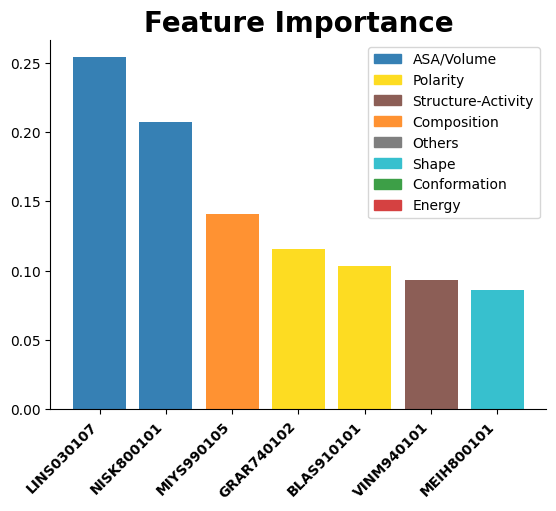

In [21]:
#best_params= {'bootstrap': [True], 'class_weight': ['balanced'], 'criterion': ['gini'], 'max_depth': [15], 'max_leaf_nodes': [20], 'n_estimators': [340], 'n_jobs': [6]}
param_grid = {'bootstrap': [True], 'ccp_alpha': [0], 'class_weight': ['balanced_subsample'], 'criterion': ['gini'], 'max_depth': [10], 'max_leaf_nodes': [80], 'max_samples': [0.6], 'n_estimators': [300], 'n_jobs': [-1], 'verbose': [0]}
AM_N2_forest = ml_ref.ForestTMDrefind.make_forest(trainN2_scale_df, train_N2_label_df, job_name="am_N2_drop(3)", n_jobs=-1, param_grid=param_grid)
AM_N2_forest.fetch_a_tree()
AM_N2_forest.hyperparameter_summary(save_table=True)
AM_N2_forest.feature_importance()

In [22]:
test_labels_pred = AM_N2_forest.predict_labels(testN2_scale_df) 
test_labels_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0])

Accuracy: 0.7375886524822695
Precision: 0.4051724137931034
Recall: 0.9038461538461539
F1:  0.5595238095238095


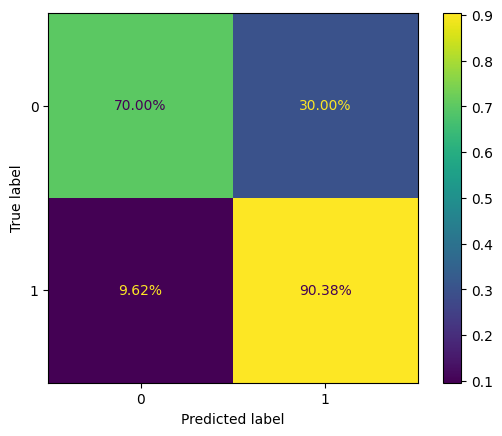

In [23]:
AM_N2_forest.test_predict_quality(label_test=test_N2_label_df, label_pred=test_labels_pred, cm_save=True)

In [24]:
# P05067, APP, 701
seq = "MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMNVQNGKWDSDPSGTKTCIDTKEGILQYCQEVYPELQITNVVEANQPVTIQNWCKRGRKQCKTHPHFVIPYRCLVGEFVSDALLVPDKCKFLHQERMDVCETHLHWHTVAKETCSEKSTNLHDYGMLLPCGIDKFRGVEFVCCPLAEESDNVDSADAEEDDSDVWWGGADTDYADGSEDKVVEVAEEEEVAEVEEEEADDDEDDEDGDEVEEEAEEPYEEATERTTSIATTTTTTTESVEEVVREVCSEQAETGPCRAMISRWYFDVTEGKCAPFFYGGCGGNRNNFDTEEYCMAVCGSAMSQSLLKTTQEPLARDPVKLPTTAASTPDAVDKYLETPGDENEHAHFQKAKERLEAKHRERMSQVMREWEEAERQAKNLPKADKKAVIQHFQEKVESLEQEAANERQQLVETHMARVEAMLNDRRRLALENYITALQAVPPRPRHVFNMLKKYVRAEQKDRQHTLKHFEHVRMVDPKKAAQIRSQVMTHLRVIYERMNQSLSLLYNVPAVAEEIQDEVDELLQKEQNYSDDVLANMISEPRISYGNDALMPSLTETKTTVELLPVNGEFSLDDLQPWHSFGADSVPANTENEVEPVDARPAADRGLTTRPGSGLTNIKTEEISEVKMDAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIATVIVITLVMLKKKQYTSIHHGVVEVDAAVTPEERHLSKMQQNGYENPTYKFFEQMQN"

Begin process aa_numeric_by_scale:  10:39:49
End process aa_numeric_by_scale:  10:39:49
Process time: 0.18 seconds


['APP', 701]

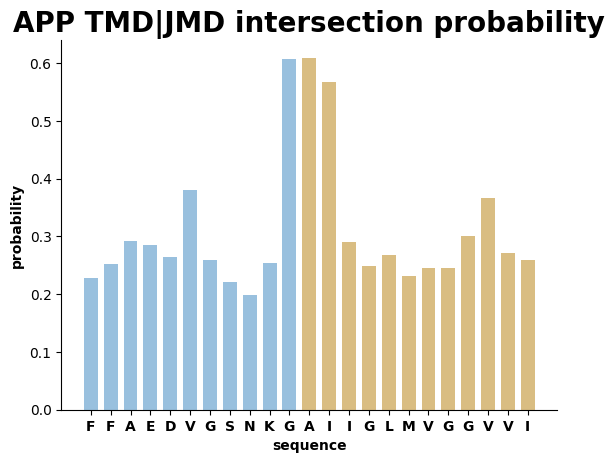

In [25]:
AM_N2_forest.pred_from_seq("APP", seq, 701, rounds=100)

Begin process aa_numeric_by_scale:  10:39:52
End process aa_numeric_by_scale:  10:39:52
Process time: 0.12 seconds


['BCAM', 547]

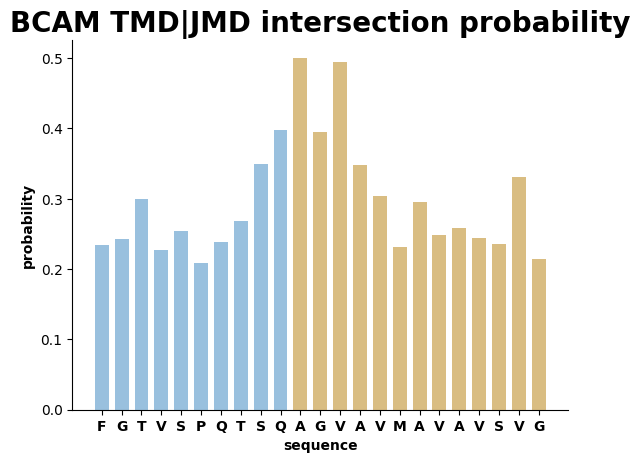

In [26]:
seq = "MEPPDAPAQARGAPRLLLLAVLLAAHPDAQAEVRLSVPPLVEVMRGKSVILDCTPTGTHDHYMLEWFLTDRSGARPRLASAEMQGSELQVTMHDTRGRSPPYQLDSQGRLVLAEAQVGDERDYVCVVRAGAAGTAEATARLNVFAKPEATEVSPNKGTLSVMEDSAQEIATCNSRNGNPAPKITWYRNGQRLEVPVEMNPEGYMTSRTVREASGLLSLTSTLYLRLRKDDRDASFHCAAHYSLPEGRHGRLDSPTFHLTLHYPTEHVQFWVGSPSTPAGWVREGDTVQLLCRGDGSPSPEYTLFRLQDEQEEVLNVNLEGNLTLEGVTRGQSGTYGCRVEDYDAADDVQLSKTLELRVAYLDPLELSEGKVLSLPLNSSAVVNCSVHGLPTPALRWTKDSTPLGDGPMLSLSSITFDSNGTYVCEASLPTVPVLSRTQNFTLLVQGSPELKTAEIEPKADGSWREGDEVTLICSARGHPDPKLSWSQLGGSPAEPIPGRQGWVSSSLTLKVTSALSRDGISCEASNPHGNKRHVFHFGTVSPQTSQAGVAVMAVAVSVGLLLLVVAVFYCVRRKGGPCCRQRREKGAPPPGEPGLSHSGSEQPEQTGLLMGGASGGARGGSGGFGDEC"
AM_N2_forest.pred_from_seq("BCAM", seq, 548, rounds=100)